### ISOM 672: Business Analytics Final Project
### Team 9: Mild Trakarnsakdikul, Sylvie Zhou, Jason Hamilton, Faarid Sanaan
 

# Exploring Clean Water Data
Data Source: https://www.kaggle.com/datasets/adityakadiwal/water-potability

### Business Problem
Access to safe drinking water is essential to human health and well being. It is a basic human necessity and requirement of effective public health policy. However, access to clean water continues to be an issue at the regional, national and international levels. Research shows that investment in clean water supply and sanitation projects can yield a net economic benefit, as the reduction in adverse health effects and health care costs allow the population to flourish in economically beneficial roles. 

Countries such as Eritrea, Papua New Guinea and Uganda have the lowest access to clean water close to home, where almost 60% of the population lacks access to safe drinking water. Having the ability to identify unsafe drinking water for these residents has the potential to save countless lives.

By applying statistical models and machine learning techniques, we can help countries around the world test their water and provide access to clean water in their area. This will improve the health of the countries’ populations and lessen the burden of finding drinkable water, consequently leading to economic development. Our exploration can help identify important features of safe drinking water which will allow others to expand our research to additional populations. Expanding use of machine learning techniques to identify clean water can save lives around the world. 


### Data features includes: 
* pH of water: the acidity or basic of water (0 to 14)
* Hardness: capacity of water to precipitate soap in milligram per liter (mg/L)
* Solids: total dissolved solids in parts per million (ppm)
* Chloramines: Amount of Chloramines in parts per million (ppm)
* Sulfate: Amount of Sulfates dissolved in milligram per liter (mg/L)
* Conductivity: Electrical conductivity of water in microsiemens per centimeter (μS/c)
* Organic_carbon: Amount of organic carbon in parts per million (ppm)
* Trihalomethanes: Amount of Trihalomethanes in microgram per liter (μg/L)
* Turbidity: Measure of light emitting property of water in nephelometric turbidity units (NTU)

We will be predictint the portability of the water where 1 is portable and 0 is not portable.

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing data into google colab through google drive
#This will prompt for authorization to mount your google drive to the google colab
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
data = pd.read_csv('water_potability.csv')

In [ ]:
#@title
data['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
data['Potability']=1-data['Potability']

In [ ]:
data['Potability']

0       1
1       1
2       1
3       1
4       1
       ..
3271    0
3272    0
3273    0
3274    0
3275    0
Name: Potability, Length: 3276, dtype: int64

In [ ]:
data.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [ ]:
np.array(data.mean())

array([7.08079450e+00, 1.96369496e+02, 2.20140925e+04, 7.12227679e+00,
       3.33775777e+02, 4.26205111e+02, 1.42849702e+01, 6.63962929e+01,
       3.96678617e+00, 3.90109890e-01])

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#histograms of each variable
data.hist(figsize = (10,10))
data[data['Potability']==1].hist(figsize = (10,10))

In [ ]:
#Portability is 1 - means good for Human
data[data['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,1.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,1.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,1.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,1.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,1.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,1.0


In [ ]:
data[data['Potability']==0].hist(figsize = (10,10))

In [ ]:
# Portability is 0 - means not good for Human
data[data['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,0.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,0.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,0.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,0.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,0.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,0.0


In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
corr = data.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [ ]:
fig, ax = plt.subplots(figsize=(30,20))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask=mask, square = True, annot = True, vmin = -0.2, vmax = 0.2, linewidths = .5)
ax.set_title("Water Data Correlation Heatmap",fontsize=20)

## Data Preprocessing 

Getting Rid of Missing Values

In [ ]:
#Fill missing values via the column mean since the median is similar to the meN
data['ph'].fillna(value=data['ph'].mean(), inplace=True)

In [ ]:
#Fill missing values via the column mean since the median is similar to the meN
data['Sulfate'].fillna(value=data['Sulfate'].mean(), inplace=True)

In [ ]:
data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Modeling

In [ ]:
from __future__ import division, print_function, unicode_literals 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifierCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import tensorflow as tf

from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
# predictors
X = data.iloc[:,:9]
#X = data.loc[:,data.columns != 'Potability']
xlist=X.columns

In [ ]:
# target
y = data.iloc[:,9]

In [ ]:
def modeling(estimator,y_train,x,x_train,x_test):
    print('Estimator Used:', estimator)
    
    if estimator == 'log':
        log = LogisticRegression(solver = 'lbfgs')
        log.fit(x_train, y_train)
        log_cv=cross_val_score(log,x, y,cv=5, scoring='balanced_accuracy')
        print('Logistic Regression Test CV balanced_accuracy:', round(log_cv.mean(),2), '+/-', round(log_cv.std(),2))
        return log.predict(x_test)
    
    elif estimator == 'knn':
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(x_train, y_train)
        knn_cv=cross_val_score(knn,x, y,cv=5, scoring='balanced_accuracy')
        print('KNN Classifier Test CV balanced_accuracy:', round(knn_cv.mean(),2), '+/-', round(knn_cv.std(),2))
        return knn.predict(x_test)
        
    elif estimator == 'tree':
        tree = DecisionTreeClassifier()
        tree.fit(x_train, y_train)
        tree_cv=cross_val_score(tree,x, y,cv=5, scoring='balanced_accuracy')
        print('Decision Tree Classifier Test CV balanced_accuracy:',round(tree_cv.mean(),2),'+/-',round(tree_cv.std(),2))
        return tree.predict(x_test)
    
    else:
        print('ERROR Parameters')

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix, cohen_kappa_score
def evaluation(y_test,prediction):
  # Accuracy
  print('Positive Accuracy: %.2f' % accuracy_score(y_test,prediction))
  # Recall
  print('Positive Recall: %.2f' %recall_score(y_test,prediction))
  # F1 score
  print('Positive F1 score (test): %.2f' %f1_score(y_test,prediction))          
  print(classification_report(y_test,prediction, target_names=list(['Portable','Not Portable']))) 

## Feature Engineering

In [ ]:
def feature_engineering(X_fe,model,cv,interactions):
  interaction_dict_cv = {}
  for interaction in interactions: 
    X_fe['int']=X_fe[interaction[0]]*X_fe[interaction[1]]
    X_train_fe, X_test_fe, y_train, y_test = train_test_split(X_fe, y, test_size=0.25, random_state=42, stratify=y)
    model.fit(X_train_fe, y_train)
    mse_cv = cross_val_score(model,X_fe,y,cv=cv, scoring='recall')
    mse_test=mse_cv.mean()
    interaction_dict_cv[mse_test] = interaction
  X_fe=X_fe.drop(columns='int')
  return interaction_dict_cv

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# [1,a,b,ab,a^2,b^2]
quadratic = PolynomialFeatures(degree=2)
# [1,a,b,a^2b,ab^2,a^3,b^3 ]
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X) 
X_cubic = cubic.fit_transform(X)
# Data split with polynomial features of degree=2
X_quad_train, X_quad_test, y_train, y_test = train_test_split(X_quad,    # split validation
                                                              y, 
                                                              test_size=0.25, 
                                                              random_state=42)
# Data split with polynomial features of degree=3
X_cub_train, X_cub_test, y_train, y_test = train_test_split(X_cubic,    # split validation
                                                              y, 
                                                              test_size=0.25, 
                                                              random_state=42)

### Building Basic Model without parameter tunning

K-NN

In [ ]:
#knn standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) 
X_std=sc.transform(X)
sc.fit(X_quad_train)
X_quad_train_std = sc.transform(X_quad_train)
X_quad_test_std = sc.transform(X_quad_test) 
X_quad_std=sc.transform(X_quad)
sc.fit(X_cub_train)
X_cub_train_std = sc.transform(X_cub_train)
X_cub_test_std = sc.transform(X_cub_test) 
X_cub_std=sc.transform(X_cubic)

In [ ]:
predict_knn = modeling(estimator='knn',y_train=y_train,x=X_std,x_train=X_train_std,x_test=X_test_std)

Estimator Used: knn
KNN Classifier Test CV balanced_accuracy: 0.55 +/- 0.02


In [ ]:
evaluation(y_test,predict_knn)

Positive Accuracy: 0.54
Positive Recall: 0.70
Positive F1 score (test): 0.66
              precision    recall  f1-score   support

    Portable       0.36      0.27      0.31       309
Not Portable       0.61      0.70      0.66       510

    accuracy                           0.54       819
   macro avg       0.49      0.49      0.48       819
weighted avg       0.52      0.54      0.53       819



In [ ]:
predict_knn_qua = modeling(estimator='knn',y_train=y_train,x=X_quad_std,x_train=X_quad_train_std,x_test=X_quad_test_std)
predict_knn_cub = modeling(estimator='knn',y_train=y_train,x=X_cub_std,x_train=X_cub_train_std,x_test=X_cub_test_std)

Estimator Used: knn
KNN Classifier Test CV balanced_accuracy: 0.54 +/- 0.02
Estimator Used: knn
KNN Classifier Test CV balanced_accuracy: 0.54 +/- 0.03


Normalized confusion matrix
[[0.409375   0.590625  ]
 [0.19238477 0.80761523]]


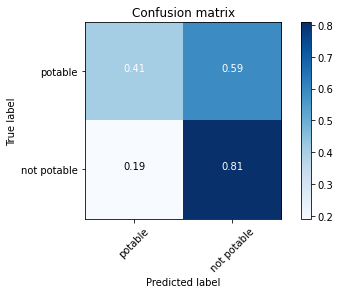

In [ ]:
knn_y_pred = KNeighborsClassifier(n_neighbors=5).fit(X_train_std,y_train).predict(X_test_std) 
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, knn_y_pred), classes= ['potable', 'not potable'], title='Confusion matrix')    
plt.show()

Decision Tree

In [ ]:
predict_tree = modeling(estimator='tree',y_train=y_train,x=X,x_train=X_train,x_test=X_test)

Estimator Used: tree
Decision Tree Classifier Test CV balanced_accuracy: 0.55 +/- 0.03


In [ ]:
evaluation(y_test,predict_tree)

Positive Accuracy: 0.52
Positive Recall: 0.62
Positive F1 score (test): 0.62
              precision    recall  f1-score   support

    Portable       0.36      0.36      0.36       309
Not Portable       0.61      0.62      0.62       510

    accuracy                           0.52       819
   macro avg       0.49      0.49      0.49       819
weighted avg       0.52      0.52      0.52       819



Decision Tree - feature engineering

Create New features - combining pairs

In [ ]:
from itertools import combinations
interactions = list(combinations(xlist, 2))

In [ ]:
X_dt_fe=X.copy()

In [ ]:
#X=X.drop(columns='int')
tree = DecisionTreeClassifier()
interaction_dict_cv = feature_engineering(X_dt_fe,tree,10,interactions)

In [ ]:
#@title
top_10_cv = sorted(interaction_dict_cv.keys(), reverse = True)[:10]
for interaction in top_10_cv:
  print(interaction_dict_cv[interaction],interaction)

('Chloramines', 'Sulfate') 0.6547035175879398
('ph', 'Chloramines') 0.6446984924623116
('Solids', 'Chloramines') 0.6421231155778895
('Hardness', 'Chloramines') 0.6416633165829146
('Hardness', 'Sulfate') 0.6406733668341709
('Chloramines', 'Conductivity') 0.6386683417085427
('ph', 'Sulfate') 0.6381859296482413
('Hardness', 'Conductivity') 0.6336633165829146
('ph', 'Organic_carbon') 0.6326683417085428
('ph', 'Turbidity') 0.6306482412060301


In [ ]:
X_dt_fe['int1']=X_dt_fe['Conductivity']*X_dt_fe['Sulfate']
X_dt_fe['int2']=X_dt_fe['Chloramines']*X_dt_fe['Sulfate']
X_dt_fe['int3']=X_dt_fe['ph']*X_dt_fe['Sulfate']
X_dt_fe['int4']=X_dt_fe['Hardness']*X_dt_fe['Conductivity']

In [ ]:
X_dt_fe=X_dt_fe.drop(columns='int2')

In [ ]:
X_train_dt_fe, X_test_dt_fe, y_train, y_test = train_test_split(X_dt_fe, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
predict_tree_fe = modeling(estimator='tree',y_train=y_train,x=X_dt_fe,x_train=X_train_dt_fe,x_test=X_test_dt_fe)

Estimator Used: tree
Decision Tree Classifier Test CV balanced_accuracy: 0.55 +/- 0.02


Create New features - polynomial

In [ ]:
predict_tree_qua = modeling(estimator='tree',y_train=y_train,x=X_quad,x_train=X_quad_train,x_test=X_quad_test)
predict_tree_cub = modeling(estimator='tree',y_train=y_train,x=X_cubic,x_train=X_cub_train,x_test=X_cub_test)

Estimator Used: tree
Decision Tree Classifier Test CV balanced_accuracy: 0.54 +/- 0.03
Estimator Used: tree
Decision Tree Classifier Test CV balanced_accuracy: 0.54 +/- 0.04


Logistic Regression

In [ ]:
predict_log = modeling(estimator='log',y_train=y_train,x=X,x_train=X_train,x_test=X_test)

Estimator Used: log
Logistic Regression Test CV balanced_accuracy: 0.5 +/- 0.0


In [ ]:
predict_log_qua = modeling(estimator='log',y_train=y_train,x=X_quad,x_train=X_quad_train,x_test=X_quad_test)
predict_log_cub = modeling(estimator='log',y_train=y_train,x=X_cubic,x_train=X_cub_train,x_test=X_cub_test)

Estimator Used: log
Logistic Regression Test CV balanced_accuracy: 0.51 +/- 0.01
Estimator Used: log
Logistic Regression Test CV balanced_accuracy: 0.51 +/- 0.01


Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


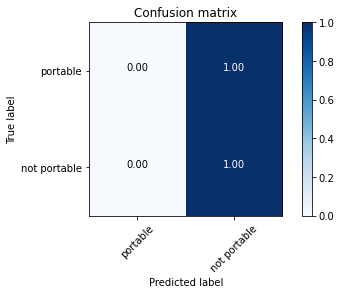

In [ ]:
lr_y_pred = LogisticRegression(solver = 'lbfgs').fit(X_train,y_train).predict(X_test) 
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, lr_y_pred), classes= ['portable', 'not portable'], title='Confusion matrix')    
plt.show()

Select Features - Ridge Regression

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier

In [ ]:
clf_l2 = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5,scoring='balanced_accuracy').fit(X_train, y_train)
tree_cv_l2=cross_val_score(clf_l2,X_quad, y,cv=5, scoring='balanced_accuracy')
print('Decision Tree Classifier Test CV balanced_accuracy:',round(tree_cv_l2.mean(),2),'+/-',round(tree_cv_l2.std(),2))

Decision Tree Classifier Test CV balanced_accuracy: 0.56 +/- 0.02


In [ ]:
clf_l2 = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5,scoring='balanced_accuracy').fit(X_quad_train, y_train)
tree_cv_l2=cross_val_score(clf_l2,X_quad, y,cv=5, scoring='balanced_accuracy')
print('Decision Tree Classifier Test CV balanced_accuracy:',round(tree_cv_l2.mean(),2),'+/-',round(tree_cv_l2.std(),2))

Decision Tree Classifier Test CV balanced_accuracy: 0.56 +/- 0.02


In [ ]:
clf_l2 = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5,scoring='balanced_accuracy').fit(X_cub_train, y_train)
tree_cv_l2=cross_val_score(clf_l2,X_cubic, y,cv=5, scoring='balanced_accuracy')
print('Decision Tree Classifier Test CV balanced_accuracy:',round(tree_cv_l2.mean(),2),'+/-',round(tree_cv_l2.std(),2))

Decision Tree Classifier Test CV balanced_accuracy: 0.57 +/- 0.02


In [ ]:
clf_l2.alpha_

1.0

Normalized confusion matrix
[[0.196875   0.803125  ]
 [0.18436874 0.81563126]]


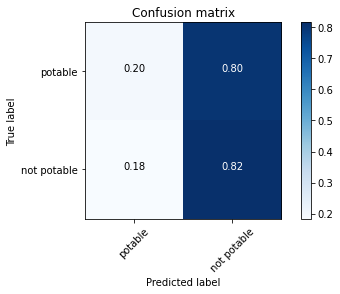

In [ ]:
l2_y_pred = RidgeClassifier(alpha=1).fit(X_cub_train,y_train).predict(X_cub_test) 
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,clf_l2), classes= ['potable', 'not potable'], title='Confusion matrix')    
plt.show()

In [ ]:
f_names=np.array(X.columns)
t_names=['potable','not potable']

In [ ]:
clf_l2.coef_ 

array([[-1.33013816e-02,  1.72999611e-04, -1.66157887e-06,
         2.36618990e-03,  8.46202588e-04,  7.04087923e-05,
        -4.00045594e-03,  5.89143665e-05, -4.71224992e-02]])

In [ ]:
average_feature_effects=clf_l2.coef_ * np.asarray(X_train.mean(axis=0)).ravel()

In [ ]:
top_5=np.argsort(average_feature_effects[0])[-5:][::-1]
f_names[top_5]

array(['Sulfate', 'Hardness', 'Conductivity', 'Chloramines',
       'Trihalomethanes'], dtype=object)

In [ ]:
lsvc=LinearSVC(penalty='l1', C=1000, dual=False,multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=42, max_iter=1000).fit(X_train, y_train)
lsvcscore=cross_val_score(lsvc,X, y,cv=5, scoring='balanced_accuracy')
print('Decision Tree Classifier Test CV Recall:',round(lsvcscore.mean(),2),'+/-',round(lsvcscore.std(),2))

Decision Tree Classifier Test CV Recall: 0.49 +/- 0.03


In [ ]:
lsvc=LinearSVC(penalty='l1', C=1000, dual=False,multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=42, max_iter=1000).fit(X_quad_train, y_train)
lsvcscore=cross_val_score(lsvc,X_quad, y,cv=5, scoring='balanced_accuracy')
print('Decision Tree Classifier Test CV Recall:',round(lsvcscore.mean(),2),'+/-',round(lsvcscore.std(),2))

Decision Tree Classifier Test CV Recall: 0.57 +/- 0.03


In [ ]:
lsvc=LinearSVC(penalty='l1', C=1000, dual=False,multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=42, max_iter=1000).fit(X_cub_train, y_train)
lsvcscore=cross_val_score(lsvc,X_cubic, y,cv=5, scoring='balanced_accuracy')
print('Decision Tree Classifier Test CV Recall:',round(lsvcscore.mean(),2),'+/-',round(lsvcscore.std(),2))

Decision Tree Classifier Test CV Recall: 0.57 +/- 0.02


### Model Parameter Tunning

In [ ]:
def param_tuning(model, param, xtrain, x):
  if model=='tree':
    dt = DecisionTreeClassifier(random_state=42)
    # internal cross validation k=5
    dt_gs = GridSearchCV(dt,param, cv=5, scoring='balanced_accuracy')
    dt_gs = dt_gs.fit(xtrain,y_train)
    dt_gs_score=cross_val_score(dt_gs.best_estimator_,x, y,cv=5, scoring='balanced_accuracy')
    print(dt_gs.best_estimator_)
    print('Decision Tree Classifier Test CV balanced_accuracy:',round(dt_gs_score.mean(),2),'+/-',round(dt_gs_score.std(),2))
    return dt_gs.best_estimator_
  elif model=='log':
    lr=LogisticRegression(random_state=42)
    lr_gs = GridSearchCV(lr, param, cv=5, scoring='balanced_accuracy')
    lr_gs = lr_gs.fit(xtrain, y_train)
    lr_gs_score=cross_val_score(lr_gs.best_estimator_,x, y,cv=5, scoring='balanced_accuracy')
    print(lr_gs.best_estimator_)
    print('Logistic Regression Test CV balanced_accuracy:',round(lr_gs_score.mean(),2),'+/-',round(lr_gs_score.std(),2))
    return lr_gs.best_estimator_
  elif model=='knn':
    knn=KNeighborsClassifier()
    knn_gs = GridSearchCV(knn, param, cv=5, scoring='balanced_accuracy')
    knn_gs = knn_gs.fit(xtrain, y_train)
    knn_gs_score=cross_val_score(knn_gs.best_estimator_,x, y,cv=5, scoring='balanced_accuracy')
    print(knn_gs.best_estimator_)
    print('KNN Test CV balanced_accuracy:',round(knn_gs_score.mean(),2),'+/-',round(knn_gs_score.std(),2))
    return knn_gs.best_estimator_
  elif model=='l2':
    l2=RidgeClassifier(random_state=42)
    l2_gs = GridSearchCV(l2,param, cv=5, scoring='balanced_accuracy')
    l2_gs = l2_gs.fit(xtrain, y_train)
    l2_gs_score=cross_val_score(l2_gs.best_estimator_,x, y,cv=5, scoring='balanced_accuracy')
    print(l2_gs.best_estimator_)
    print('Decision Tree Classifier Test CV balanced_accuracy:',round(l2_gs_score.mean(),2),'+/-',round(l2_gs_score.std(),2))
    return l2_gs.best_estimator_
  elif model=='svc':
    svc=LinearSVC(random_state=42)
    svc_gs = GridSearchCV(svc,param, cv=5, scoring='balanced_accuracy')
    svc_gs = svc_gs.fit(xtrain, y_train)
    svc_gs_score=cross_val_score(svc_gs.best_estimator_,x, y,cv=5, scoring='balanced_accuracy')
    print(svc_gs.best_estimator_)
    print('Decision Tree Classifier Test CV balanced_accuracy:',round(svc_gs_score.mean(),2),'+/-',round(svc_gs_score.std(),2))
    return svc_gs.best_estimator_

K-NN

In [ ]:
knn_params = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p':[1,2]
}

In [ ]:
knn_gs_0=param_tuning('knn', knn_params, xtrain=X_train_std, x=X_std)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance')
KNN Test CV balanced_accuracy: 0.55 +/- 0.02


In [ ]:
knn_gs_1=param_tuning('knn', knn_params, xtrain=X_quad_train_std, x=X_quad_std)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, p=1, weights='distance')
KNN Test CV balanced_accuracy: 0.54 +/- 0.04


In [ ]:
knn_gs_2=param_tuning('knn', knn_params, xtrain=X_cub_train_std, x=X_cub_std)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, p=1,
                     weights='distance')
KNN Test CV balanced_accuracy: 0.53 +/- 0.03


Decision Tree

In [ ]:
dt_params = {
    'criterion': ['entropy','gini'],
    'max_depth':[3,4,5,6,7,8,9,10,None],
    'min_samples_split':[10,20,30,40],
    'min_samples_leaf':[15,20,25,30],
    'max_features':[5,6,7,8,9,10,11,12,13,None]
}

In [ ]:
tr_gs_0=param_tuning('tree', dt_params, X_train, X)

DecisionTreeClassifier(max_features=7, min_samples_leaf=25,
                       min_samples_split=10, random_state=42)
Decision Tree Classifier Test CV balanced_accuracy: 0.57 +/- 0.01


In [ ]:
tr_gs_1=param_tuning('tree', dt_params, X_quad_train, X_quad)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=15,
                       min_samples_split=10, random_state=42)
Decision Tree Classifier Test CV balanced_accuracy: 0.55 +/- 0.04


In [ ]:
tr_gs_2=param_tuning('tree', dt_params, X_cub_train, X_cubic)

Decision Tree Classifier Test CV Recall: 0.55 +/- 0.02


Decision Tree Visualization


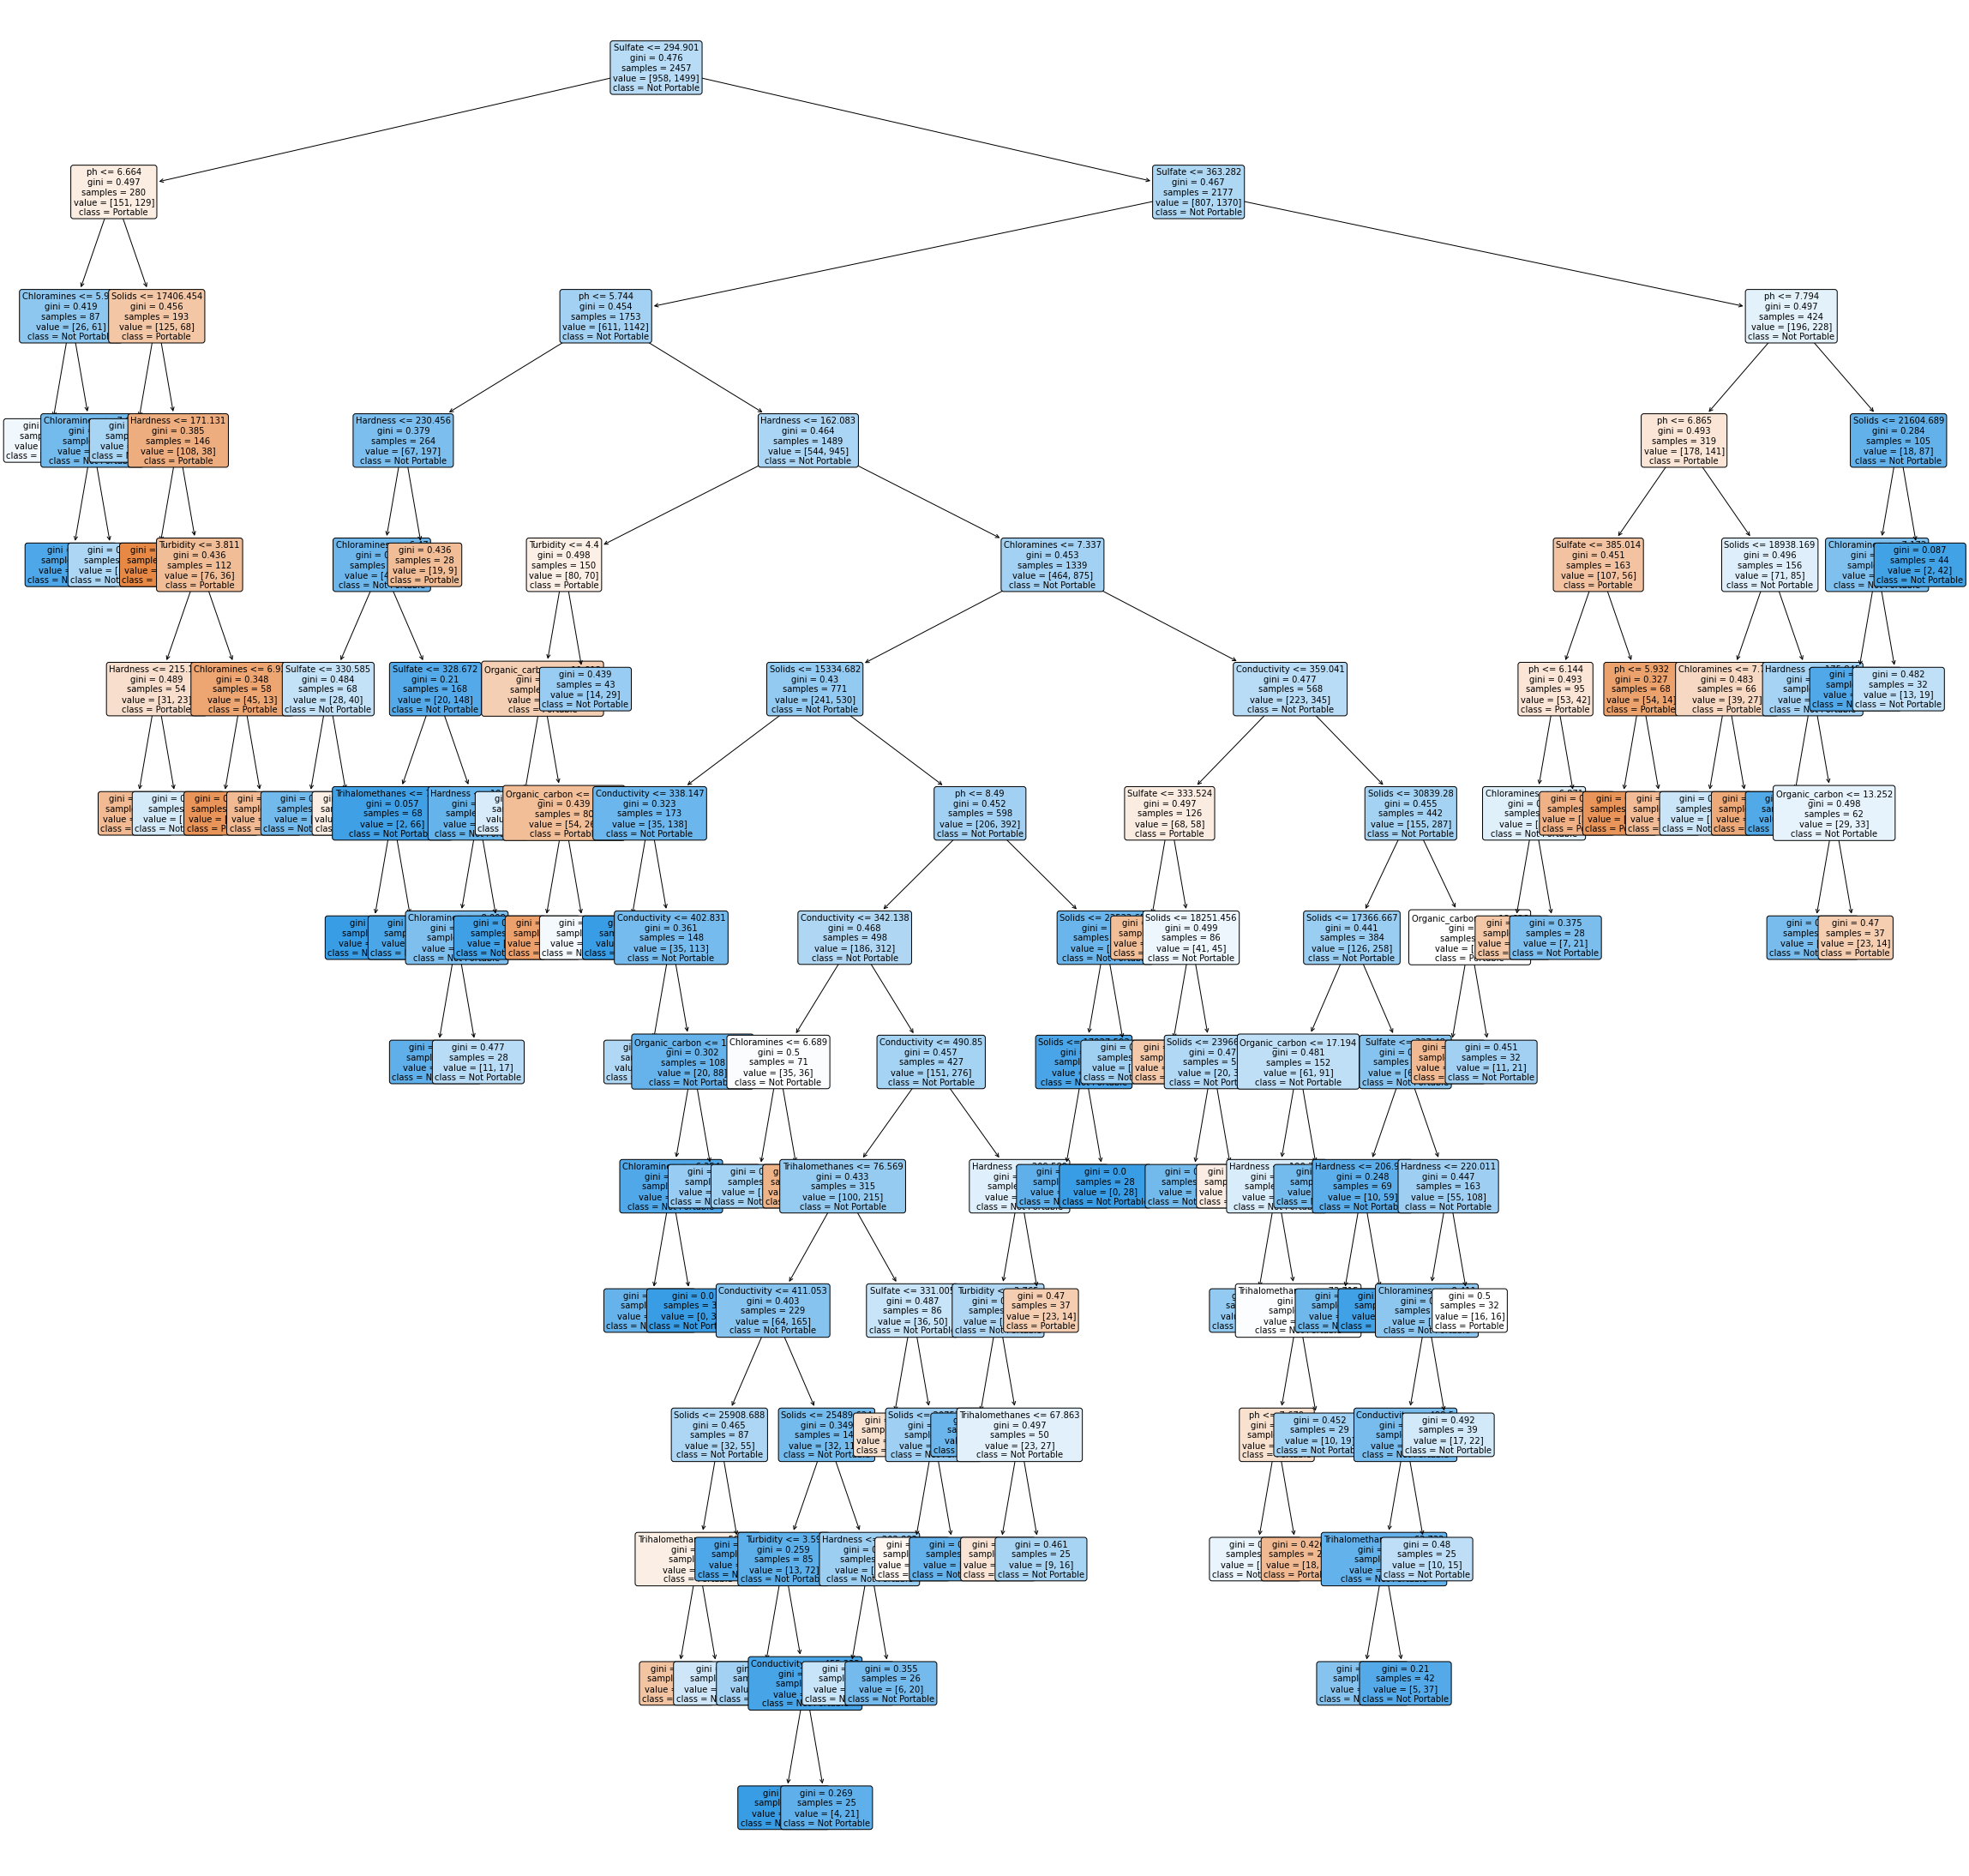

In [ ]:
#@title
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40,40))
tree.plot_tree(tr_gs_0.fit(X_train, y_train),         # the decision tree to be plotted   
               feature_names = xlist, # names of each of the features. If None, generic names will be used (“X[0]”, “X[1]”, …).
               filled = True,                      # when set to True, paint nodes to indicate majority class for classification, 
                                                   # or purity of node for multi-output.
               class_names = ['Portable','Not Portable'],    # names of each of the target classes in ascending numerical order.
               rounded = True,                     # when set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.
               fontsize=10)                        # size of text font. If None, determined automatically to fit figure.
print('Decision Tree Visualization')
plt.show()


Logistic Regression

In [ ]:
lr_params = {
    'penalty': ['l1', 'l2','none'],
    'C': [0.01,0.1,1,1e2,1e3,1e4,1e5],
    'max_iter': [50, 100, 150, 200, 500],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],                                      
}

In [ ]:
lr_gs_1=param_tuning('log', lr_params, X_train, X)

LogisticRegression(C=0.01, max_iter=50, penalty='none', random_state=42,
                   solver='newton-cg')
Logistic Regression Test CV balanced_accuracy: 0.5 +/- 0.0


In [ ]:
lr_gs_0=param_tuning('log', lr_params, X_quad_train, X_quad)

Ridge

In [ ]:
l2_params = {
    'alpha': [1e-4,1e-3,0.01,0.1,1,1e2],
    'max_iter': [50, 100, 150, 200, 500,1000],                      
    'solver': ['auto', 'lbfgs', 'liblinear'], 
    'positive':[True,False]                                     
}

In [ ]:
l2_gs = param_tuning('l2', l2_params, X_cub_train, X_cubic)

RidgeClassifier(alpha=1, max_iter=50, random_state=42)
Decision Tree Classifier Test CV balanced_accuracy: 0.57 +/- 0.02


## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix           # confusion_matrix will help us compute confusion matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # devide absolute number of observations with sum across columns to get the relative percentage of observations
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)         # shows the confusion matrix in the console
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       # add tick marks to the confusion matrix
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          # choose format depending on whether the confusion matrix is normalizaed or not
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # loop that adds the value to each cell of the confusion matrix
        plt.text(j, i, format(cm[i, j], fmt),                              # we reformat how the cell values are displayed accroding to the variable fmt we defined before
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.45625    0.54375   ]
 [0.26853707 0.73146293]]


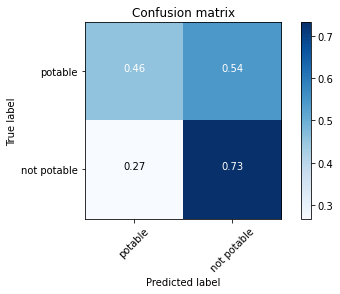

In [ ]:
tr_y_pred =tr_gs_0.fit(X_train,y_train).predict(X_test) 
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, tr_y_pred), classes= ['potable', 'not potable'], title='Confusion matrix')    
plt.show()

Normalized confusion matrix
[[0.028125   0.971875  ]
 [0.04408818 0.95591182]]


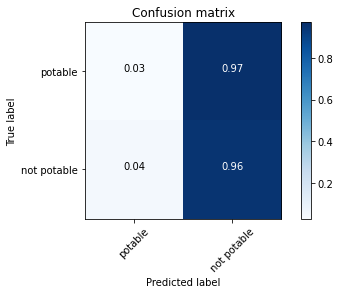

In [ ]:
lr_y_pred =LogisticRegression(random_state=42,C = 0.01,max_iter = 1000, penalty = 'none',solver='newton-cg').fit(X_quad_train,y_train).predict(X_quad_test) 
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, lr_y_pred), classes= ['potable', 'not potable'], title='Confusion matrix')    
plt.show()

In [ ]:
cross_val_score(LogisticRegression(random_state=42,C = 0.01,max_iter = 1000, penalty = 'none',solver='newton-cg'),X_quad, y,cv=5, scoring='balanced_accuracy').mean()

0.5569010531844316

Normalized confusion matrix
[[0.196875   0.803125  ]
 [0.18436874 0.81563126]]


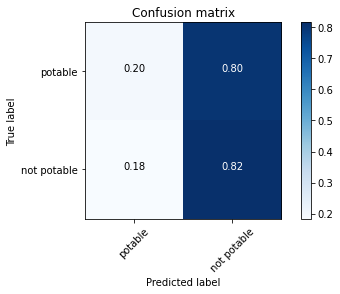

In [ ]:
l2_y_pred = RidgeClassifier(alpha=1, max_iter=50, random_state=42).fit(X_cub_train,y_train).predict(X_cub_test) 
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, l2_y_pred), classes= ['potable', 'not potable'], title='Confusion matrix')    
plt.show()

In [ ]:
knn_best=knn_gs_0
lr_best=lr_gs_0
tree_best=tr_gs_1
l2_best=l2_gs

In [ ]:
clf_labels = ['Logistic Regression', 'Decision Tree', 'kNN']
all_clf = [lr_best, tree_best, knn_best]
x_train=[X_quad_train,X_quad_train,X_train]
x_test=[X_quad_test,X_quad_test,X_test]

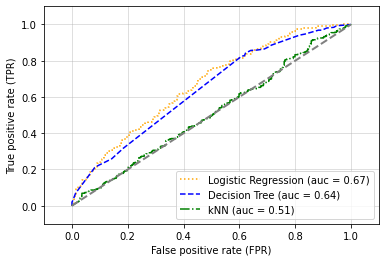

In [ ]:
colors = [ 'orange', 'blue', 'green']     
linestyles = [':', '--', '-.', '-']        
for clf, label, xtrain, xtest, clr, ls in zip(all_clf,
               clf_labels, x_train, x_test, colors, linestyles):

    
    y_pred = clf.fit(xtrain, y_train).predict_proba(xtest)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,       
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           
    plt.plot(fpr, tpr,                                    
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')   
plt.plot([0, 1], [0, 1],        
         linestyle='--',        
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])  
plt.ylim([-0.1, 1.1])  
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

### **Learning Curves**

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
### Function for Learning Curves 
def plot_learning_curve(estimator, title, X, y, scoring_method, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1, 10)):
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel(scoring_method)             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring = scoring_method, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,random_state =42)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

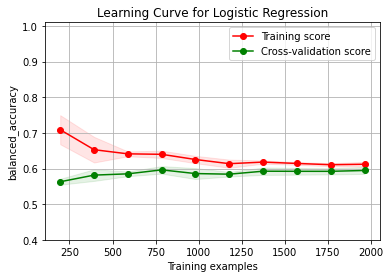

In [ ]:
plot_learning_curve(lr_best, "Learning Curve for Logistic Regression", X_quad_train, y_train, 'balanced_accuracy',(0.40, 1.01), cv=5, n_jobs=-1)
plt.show()

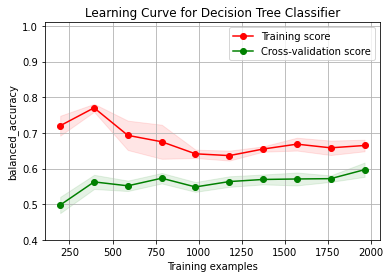

In [ ]:
plot_learning_curve(tree_best, "Learning Curve for Decision Tree Classifier", X_quad_train, y_train, 'balanced_accuracy',(0.40, 1.01), cv=5, n_jobs=-1)
plt.show()

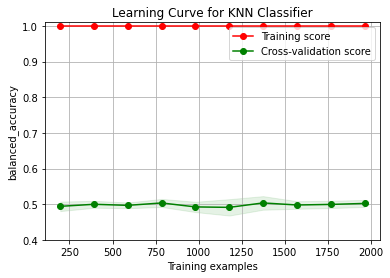

In [ ]:
plot_learning_curve(knn_best, "Learning Curve for KNN Classifier", X_train_std, y_train, 'balanced_accuracy',(0.40, 1.01), cv=5, n_jobs=-1)
plt.show()

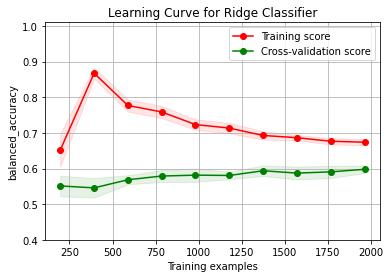

In [ ]:
plot_learning_curve(l2_best, "Learning Curve for Ridge Classifier", X_cub_train, y_train, 'balanced_accuracy',(0.40, 1.01), cv=5, n_jobs=-1)
plt.show()

Fitting Graph

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
# Function for fitting graphs
def plot_fitting_curve(estimator, title, X, y,param_name,param_range,scoring_method, ylim=None, cv=None,
                        n_jobs=-1):
   
    plt.figure() 
    plt.grid()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Parameter "+param_name) 
    plt.ylabel(scoring_method)
    
    train_scores, test_scores = validation_curve(estimator=estimator, X=X,y=y,param_name=param_name, param_range=param_range,cv=cv,scoring=scoring_method,n_jobs=4)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training recall-score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    
    plt.plot(param_range, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation recall-score')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    plt.legend(loc='best')
    plt.tight_layout()
    return plt

In [ ]:
from sklearn.linear_model import RidgeClassifier

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

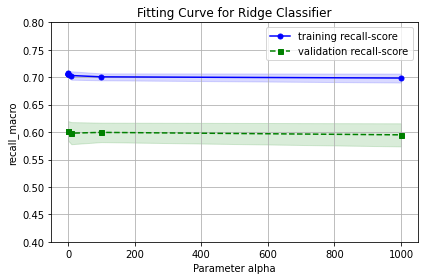

In [ ]:
alphas=[1e-5, 1e-4, 1e-3,1e-2, 1e-1, 10,100,1000]
rig=RidgeClassifier(tol=0.001, class_weight='balanced', solver='auto', positive=False, random_state=42)
plot_fitting_curve(rig, "Fitting Curve for Ridge Classifier", X_cub_train, y_train,'alpha',alphas,'recall_macro', ylim=[0.4,0.8], cv=5,
                        n_jobs=-1)